### Estadistica - Fitness_analysis - C312
Integrantes:
- David Lezcano Becerra
- Alfredo Nuño Oquendo

In [43]:
import pandas as pd

# Ruta del primer archivo CSV
file_path1 = 'dailyActivity3-4.csv'

# Ruta del segundo archivo CSV
file_path2 = 'dailyActivity4-5.csv'

# Cargar el primer archivo CSV en un DataFrame
df1 = pd.read_csv(file_path1)

# Cargar el segundo archivo CSV en otro DataFrame
df2 = pd.read_csv(file_path2)

# Concatenar df2 al final de df1
df = pd.concat([df1, df2], ignore_index=True)

# Seleccionar todas las columnas excepto 'TrackerDistance', 'Date' y 'LoggedActivitiesDistance'
df = df.drop(columns=['Id', 'TrackerDistance', 'LoggedActivitiesDistance', 'ActivityDate'])

# Suponiendo que 'df' es tu DataFrame
# df = pd.DataFrame(...)

# Identificar las filas donde 'TotalSteps' es igual a 0
rows_to_drop = df[df['TotalSteps'] == 0].index

# Eliminar esas filas del DataFrame
df = df.drop(rows_to_drop)

# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()

# Imprimir el array de nombres de columnas
print(column_names)


pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']


,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000
mean,8078.963,5.792,1.551,0.597,3.543,0.002,21.768,14.348,205.692,951.506,2337.014
std,4870.241,3.793,2.703,0.894,1.932,0.008,32.668,20.511,101.261,290.430,730.941
min,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000
25%,4499.500,3.060,0.000,0.000,2.180,0.000,0.000,0.000,141.000,720.000,1848.500
50%,7640.000,5.410,0.320,0.270,3.530,0.000,5.000,8.000,206.000,1011.000,2202.000
75%,10991.500,7.790,2.125,0.820,4.870,0.000,33.000,20.000,270.500,1189.000,2818.500
max,36019.000,28.030,21.920,6.480,12.510,0.110,210.000,143.000,720.000,1440.000,4900.000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Asegúrate de que 'df' es tu DataFrame
for column in df.columns:
    plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura
    sns.histplot(df[column], kde=True) # Crea un histograma con una línea de densidad
    plt.title(f'Distribución de {column}') # Título del gráfico
    plt.show() # Muestra el gráfico

In [ ]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()  

# Reemplazar outliers con el valor mínimo o máximo dentro del rango de IQR
df_clean = df.copy()
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df_clean.loc[df[column] < (Q1 - 1.5 * IQR), column] = Q1 - 1.5 * IQR
        df_clean.loc[df[column] > (Q3 + 1.5 * IQR), column] = Q3 + 1.5 * IQR

# for column in df_clean.columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df_clean[column])
#     plt.title(f'Boxplot de {column} sin outliers')
#     plt.show()

 
for column in df_clean.columns:
    plt.figure(figsize=(10, 6))  
    sns.histplot(df_clean[column], kde=True) 
    plt.title(f'Distribución de {column} después de la limpieza') 
    plt.show() 

In [ ]:
df = df_clean
for x in df.columns:
    print(f"El kurtosis de {x} es {df[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df[x].skew()}")

TotalSteps tiene una distribucion con una cola menos pesada y asimetria moderada lo que sugiere que hay valores mas extremos y que la distribucion es mas pesada en la cola. VeryActiveDistance tiene una asimetria alta, lo que indica una distribucion mas asimetrica con mas valores en una cola de distribucion que en la otra.

### Test de Normalidad

In [ ]:
from scipy.stats import kstest, norm, shapiro
import numpy as np

# Suponiendo que 'TotalSteps' es una columna de un DataFrame llamado df
total_steps = df['TotalSteps']
# Asegúrate de que 'TotalSteps' es una columna de tu DataFrame df
# Selecciona 100 filas aleatorias de 'TotalSteps'


for x in df.columns:
    test = df[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

La discrepancia entre los resultados de la prueba de Kolmogorov-Smirnov (K-S) y las medidas de kurtosis y asimetría puede surgir debido a varias razones. La kurtosis y la asimetría son medidas estadísticas que describen la forma de la distribución de una variable, pero no son suficientes por sí solas para determinar si una distribución es normal. La normalidad es una propiedad compleja que se refiere a la forma específica de la distribución, y la K-S es una prueba no paramétrica que evalúa la similitud entre la distribución empírica de una muestra y una distribución teórica (en este caso, la distribución normal).

### K-S vs. Kurtosis y Asimetría

- **K-S**: Esta prueba es sensible a la ubicación y la escala de la distribución, pero no a su forma. Por lo tanto, puede detectar diferencias significativas entre la distribución empírica y la normal, incluso si la kurtosis y la asimetría son similares.

- **Kurtosis y Asimetría**: Estas medidas describen la forma de la distribución, pero no son suficientes para determinar si una distribución es normal. La normalidad se refiere a la forma específica de la distribución, que es plana y simétrica.

### Interpretación de los Resultados

- **K-S**: Un valor p extremadamente bajo (como el que has proporcionado) indica que la distribución de `SedentaryActiveDistance` es significativamente diferente de la distribución normal.

- **Kurtosis y Asimetría**: Si estas medidas indican que la distribución de `SedentaryActiveDistance` se acerca a la normal, es posible que la diferencia entre la distribución empírica y la normal no sea suficientemente grande para ser detectada por la K-S, especialmente si la muestra es grande.

### Conclusión

La discrepancia entre los resultados de la K-S y las medidas de kurtosis y asimetría sugiere que, aunque la distribución de por ejmplo `SedentaryActiveDistance` puede parecer normal en términos de kurtosis y asimetría, hay diferencias significativas en su forma que la hacen diferente de la distribución normal. Esto puede ser importante dependiendo del contexto y del propósito del análisis. Por ejemplo, si estás utilizando métodos estadísticos que asumen normalidad, es posible que necesites considerar transformaciones de los datos o utilizar métodos no paramétricos que no requieran la suposición de normalidad.

In [ ]:
for x in df.columns:
    test = df[x].sample(49)
    W, p_value = shapiro(test)
    print(x)    
    print(f"W = {W}")
    print(f"p-value = {p_value}")
    plt.figure(figsize=(10, 6))  
    sns.histplot(test, kde=True) 
    plt.title(f'Distribución de {x} después de la limpieza') 
    plt.show() 
    print()

In [ ]:
import seaborn as sns

# Identificar las columnas que terminan en "Minutes"
minutes_columns = [col for col in df.columns if col.endswith('Minutes')]

# Iterar sobre las columnas identificadas y generar un gráfico de puntos
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=f'{column}', y='Calories', data=df)
    plt.title(f'Calories vs {column}')
    plt.show()

In [48]:
import pandas as pd

# Suponiendo que df es tu DataFrame
# Crea una nueva columna 'SumColumn' que es la suma de 'ColumnA' y 'ColumnB'
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']
print(df)

df['Velocidad'] = df['TotalDistance'] / df['TotalMinutes']

# Ahora df tiene una nueva columna 'SumColumn' con la suma de 'ColumnA' y 'ColumnB'

      TotalSteps  TotalDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0          11004          7.110               2.570                     0.460   
1          17609         11.550               6.920                     0.730   
2          12736          8.530               4.660                     0.160   
3          13231          8.930               3.190                     0.790   
4          12041          7.850               2.160                     1.090   
...          ...            ...                 ...                       ...   
1392       10686          8.110               1.080                     0.200   
1393       20226         18.250              11.100                     0.800   
1394       10733          8.150               1.350                     0.460   
1395       21420         19.560              13.220                     0.410   
1396        8064          6.120               1.820                     0.040   

      LightActiveDistance  

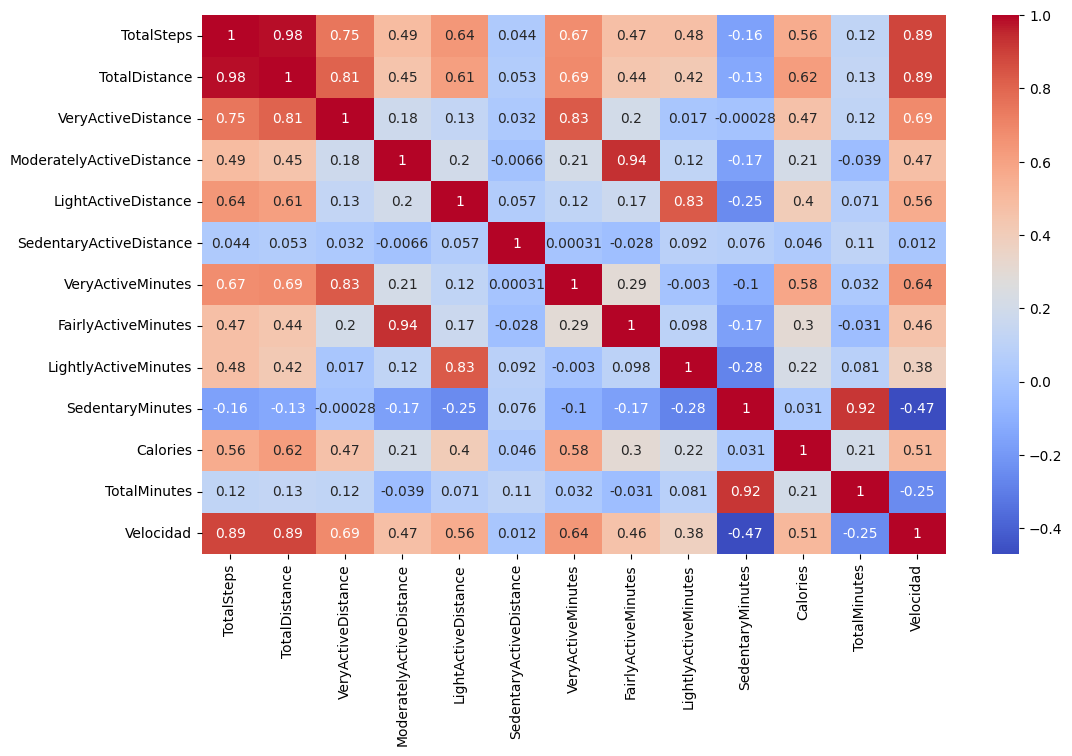

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
# print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Modelos de Regresion Lineal

### Modelo 1

Vamos a hacer el análisis con todas las variables para intentar predecir Calorías

In [195]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
X = X.drop('Velocidad', axis=1)
X = X.drop('TotalMinutes', axis=1)
X = X.drop('TotalStepsCat', axis=1)
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
# print(model.summary())

In [197]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 139413.85821053805
Coeficiente de Determinación R^2: 0.7218702899178905


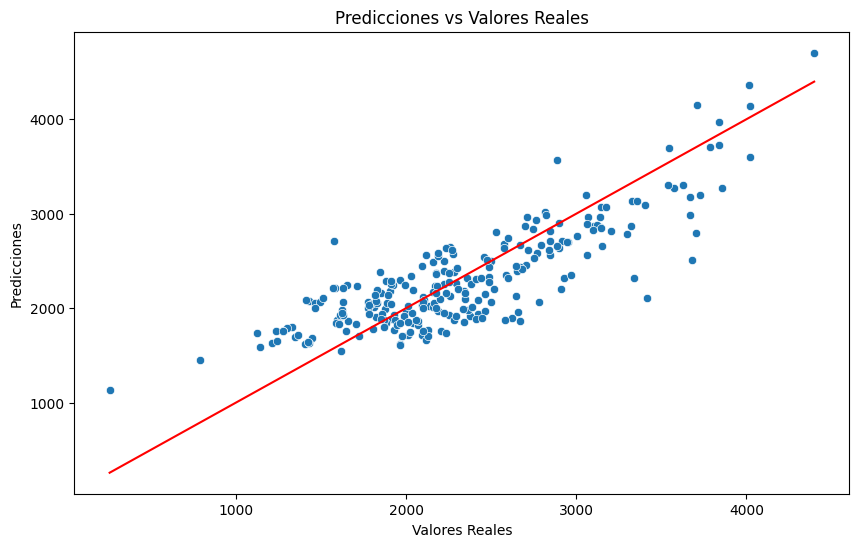

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

### Modelo 2

Hagamos el análisis eliminando las variables independientes a Calorías

In [203]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1)
X = X.drop('SedentaryActiveDistance', axis=1)
X = X.drop('SedentaryMinutes', axis=1)
X = X.drop('TotalStepsCat', axis=1)
# X = X.drop('Velocidad', axis=1)
# X = X.drop('TotalMinutes', axis=1)
y = df['Calories']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     278.2
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          8.34e-280
Time:                        14:36:09   Log-Likelihood:                -7381.7
No. Observations:                1004   AIC:                         1.479e+04
Df Residuals:                     993   BIC:                         1.484e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [205]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 139631.83151686273
Coeficiente de Determinación R^2: 0.7214354346368455


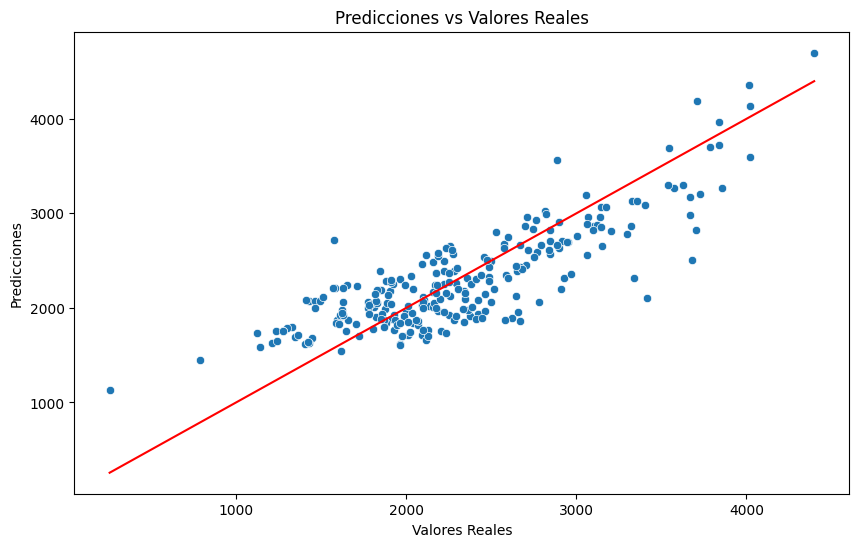

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

## Análisis de residuos

### Code

In [206]:
residuos = model.resid

In [207]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: 3.707277955184969e-12
La media de los residuos es cero.
Suma de los residuos: 3.722107067005709e-09
La suma de los residuos es cero.


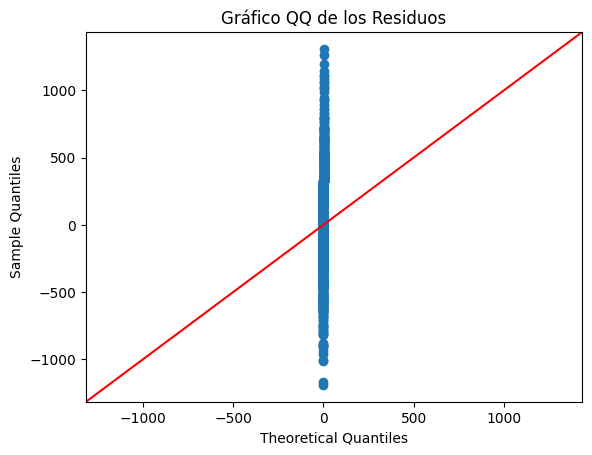

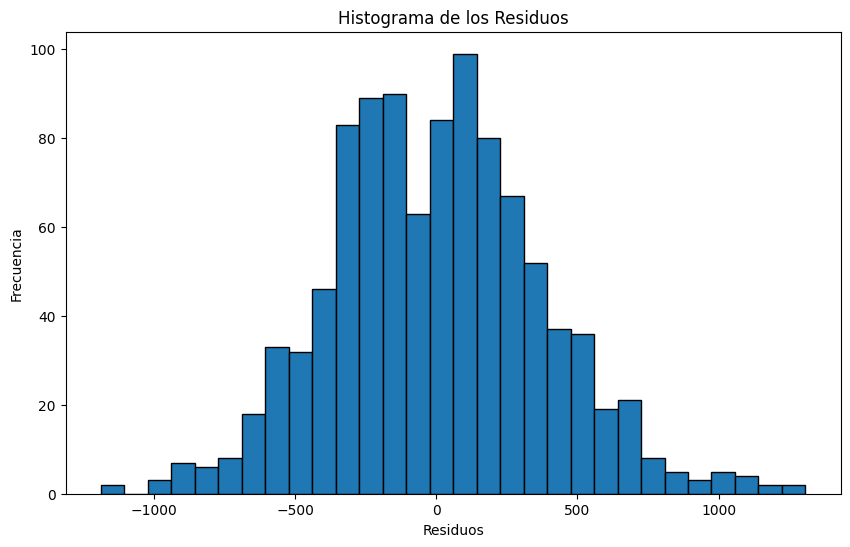

In [208]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

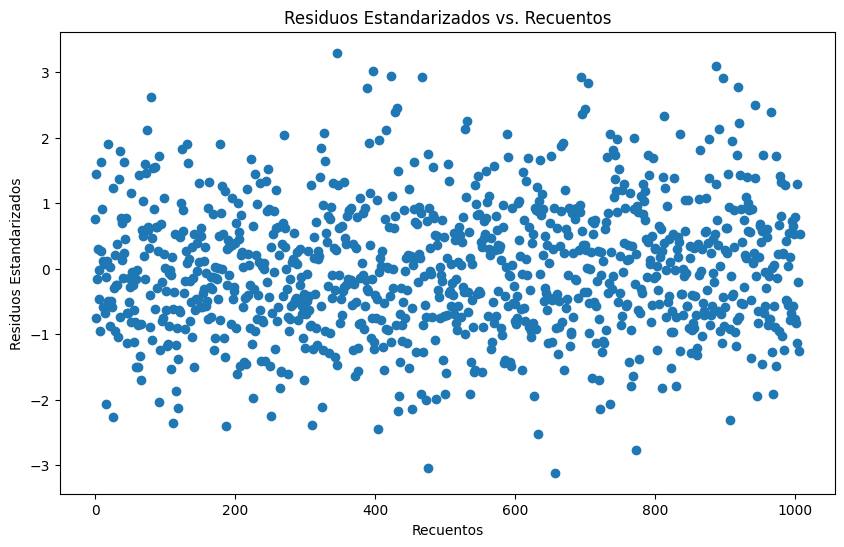

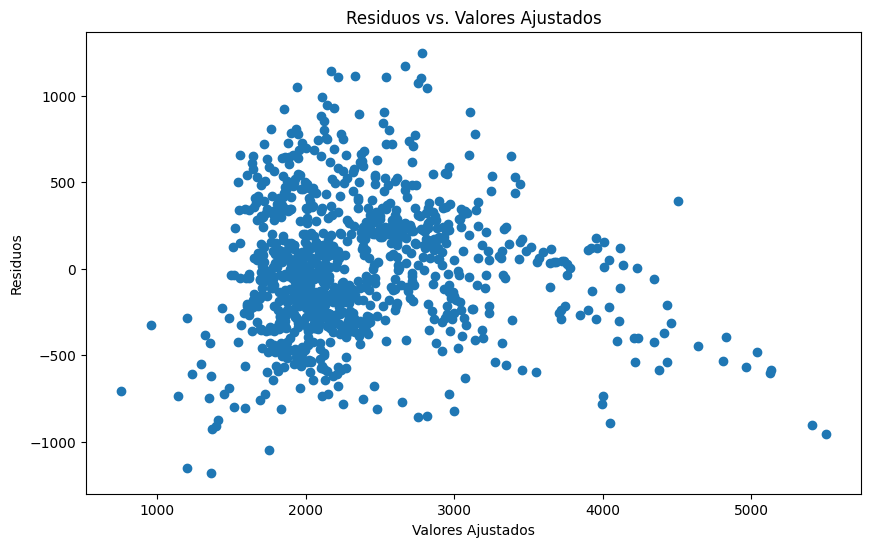

[('Lagrange multiplier statistic', 103.2721243509265), ('p-value', 1.2694204218623772e-16), ('f-value', 10.336555193209202), ('f p-value', 4.299377977507932e-18)]


In [133]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

### Test de Kolmogorov-Smirnov

In [209]:
# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

D = 0.50182091732695, p-value = 1.937371803290424e-234
Los residuos no parecen estar normalmente distribuidos.


### Conclusiones de los residuos del modelo 1

Los residuos no están normalmente distribuidos

## PCA

Aplicando la técnica PCA (Principal Component Analysis) vamos a reducir la dimensionalidad de los datos

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Primero estandarizamos los datos para asegurarnos de que estaremos trabajando con datos en la misma escala

In [211]:
# Seleccionamos las variables que vamos a analizar
pca_data = df[['TotalSteps', 'Velocidad', 'TotalMinutes', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']]


scaler = StandardScaler()
scaled_results = scaler.fit_transform(pca_data)

pca_data.columns

Index(['TotalSteps', 'Velocidad', 'TotalMinutes', 'TotalDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [212]:
# Aplicando PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_results)
print(pca_results)

[[ 0.66684765  0.65545598]
 [ 3.82625198  0.79349658]
 [ 1.75057799  1.07170981]
 ...
 [ 0.9239438  -1.05025037]
 [ 6.41092355 -2.61109158]
 [-0.2176515   0.94445921]]


Se realiza un análisis de los componentes principales y para cada uno de los dos primeros se identifican las cinco características más importantes. Esto se hace tomando el valor absoluto de cada componente principal y seleccionando las cinco características con los valores más altos. Esto es útil porque nos permite entender qué características contribuyen más a cada componente principal.

In [213]:
# Análisis de los componentes principales
principal_components = pd.DataFrame(pca.components_, columns=pca_data.columns)

# Identificar características más importantes para los primeros dos componentes principales
principal_component1 = principal_components.iloc[0]
principal_component2 = principal_components.iloc[1]

# Obtener las características más importantes para el primer componente principal (PC1)
pc1_characteristics = principal_component1.abs().nlargest(5).index
print("Las 5 características más importantes para el primer componente principal (PC1) son:")
for i, characteristic in enumerate(pc1_characteristics, start=1):
    print(f"{i}. {characteristic}")

# Obtener las características más importantes para el segundo componente principal (PC2)
pc2_characteristics = principal_component2.abs().nlargest(5).index
print("\nLas 5 características más importantes para el segundo componente principal (PC2) son:")
for i, characteristic in enumerate(pc2_characteristics, start=1):
    print(f"{i}. {characteristic}")


Las 5 características más importantes para el primer componente principal (PC1) son:
1. TotalSteps
2. TotalDistance
3. Velocidad
4. VeryActiveDistance
5. VeryActiveMinutes

Las 5 características más importantes para el segundo componente principal (PC2) son:
1. SedentaryMinutes
2. TotalMinutes
3. VeryActiveDistance
4. Calories
5. VeryActiveMinutes


In [ ]:
import pandas as pd

# Suponiendo que df es tu DataFrame
# Crea una nueva columna 'SumColumn' que es la suma de 'ColumnA' y 'ColumnB'
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']
print(df)

df['Velocidad'] = df['TotalDistance'] / df['TotalMinutes']

# Ahora df tiene una nueva columna 'SumColumn' con la suma de 'ColumnA' y 'ColumnB'

      TotalSteps  TotalDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0          11004          7.110               2.570                     0.460   
1          17609         11.550               6.920                     0.730   
2          12736          8.530               4.660                     0.160   
3          13231          8.930               3.190                     0.790   
4          12041          7.850               2.160                     1.090   
...          ...            ...                 ...                       ...   
1392       10686          8.110               1.080                     0.200   
1393       20226         18.250              11.100                     0.800   
1394       10733          8.150               1.350                     0.460   
1395       21420         19.560              13.220                     0.410   
1396        8064          6.120               1.820                     0.040   

      LightActiveDistance  

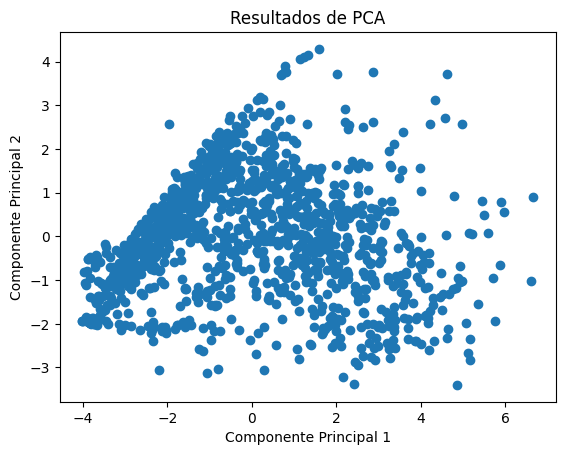

In [33]:
# Visualizar los resultados de PCA
plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de PCA')
plt.show()

A través del cálculo de la varianza explicada por cada componente nos da una idea acerca de cuánta variación es capturada por cada componente principal

Varianza explicada:
Componente principal 1: 50.03%
Componente principal 2: 17.97%

Varianza acumulada:
Hasta el componente principal 1: 50.03%
Hasta el componente principal 2: 68.00%


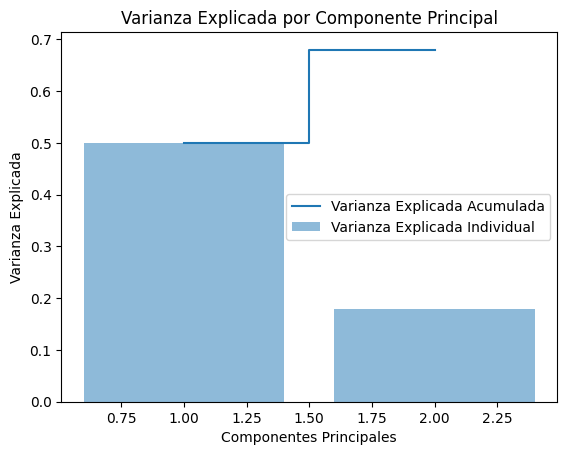

In [34]:
# Calcular la varianza explicada
explained_variance = pca.explained_variance_ratio_
acum_variance = np.cumsum(explained_variance)

print("Varianza explicada:")
for i, varianza in enumerate(explained_variance, start=1):
    print(f"Componente principal {i}: {varianza:.2%}")

print("\nVarianza acumulada:")
for i, varianza_acum in enumerate(acum_variance, start=1):
    print(f"Hasta el componente principal {i}: {varianza_acum:.2%}")

# Visualizar la varianza explicada
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza Explicada Individual')
plt.step(range(1, len(explained_variance) + 1), acum_variance, where='mid', label='Varianza Explicada Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.legend()
plt.show()

Realizamos un análisis de los componentes principales y se visualizamos la importancia de las características en cada componente principal a través de un mapa de calor.

Componentes principales 1 y 2:
  TotalSteps    TotalDistance    VeryActiveDistance    ModeratelyActiveDistance    LightActiveDistance    SedentaryActiveDistance    VeryActiveMinutes    FairlyActiveMinutes    LightlyActiveMinutes    SedentaryMinutes    Calories
------------  ---------------  --------------------  --------------------------  ---------------------  -------------------------  -------------------  ---------------------  ----------------------  ------------------  ----------
    0.42823         0.429513               0.335616                   0.297772                0.283022                2.71051e-20             0.33582                0.30264                 0.215291           -0.105326   0.298195
    0.037464        0.0123994             -0.362804                  -0.0759501               0.52674                 1.11022e-16            -0.367475              -0.117741                0.598344           -0.265173  -0.0797424


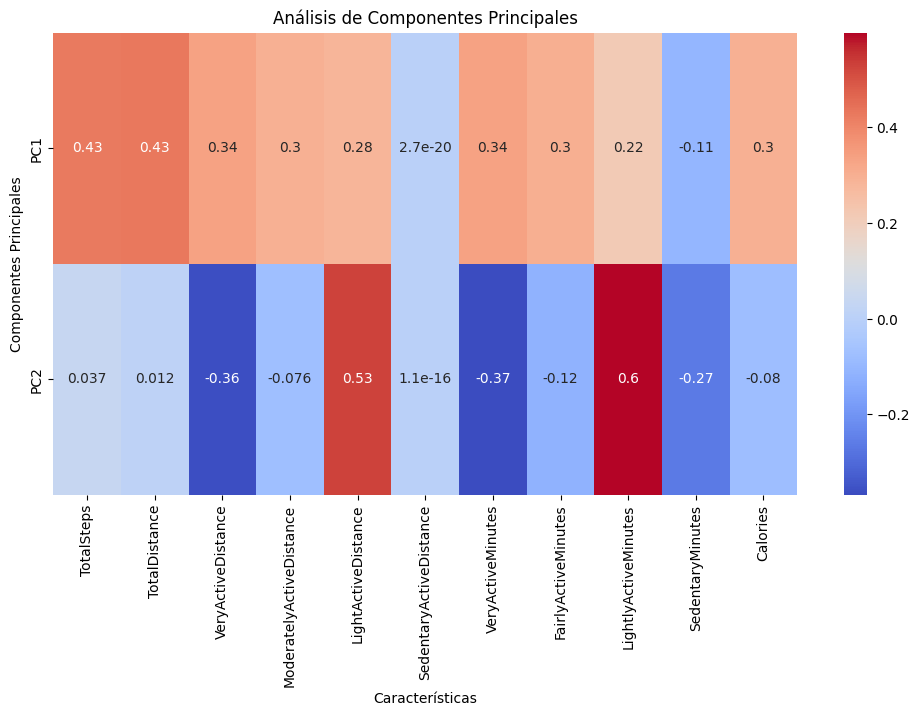

In [35]:
from tabulate import tabulate

# Seleccionar solo los componentes principales 1 y 2
principal_components_1_2 = principal_components.iloc[:2]

# Convertir el DataFrame de componentes principales 1 y 2 en una lista de listas para tabulate
principal_components_1_2_lista = principal_components_1_2.values.tolist()

# Obtener los nombres de las características originales como encabezados de la tabla
encabezados = principal_components_1_2.columns.tolist()

# Imprimir los componentes principales 1 y 2 en forma de tabla
print("Componentes principales 1 y 2:")
print(tabulate(principal_components_1_2_lista, headers=encabezados))

plt.figure(figsize=(12, 6))
sns.heatmap(principal_components, annot=True, cmap='coolwarm', yticklabels=['PC1', 'PC2'], xticklabels=pca_data.columns)
plt.title('Análisis de Componentes Principales')
plt.xlabel('Características')
plt.ylabel('Componentes Principales')
plt.show()
